### Dataset: 
Our dataset has 250K ad events or rows. Each row is one ad impression session. There are 15 input columns and one target column called high_value_user. The inputs mix time data (hour of day and day of week), context fields (inventory source, app category, device type, operating system), simple demographics (age, gender), and engagement measures such as time on page, session length, ads already seen, past click rate, days since last click, and average watch time per ad. 

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('ad_campaign2024.csv')

In [3]:
df.head()

,hour_of_day,day_of_week,inventory_source,app_category,device_type,os,age,gender,time_engaged,ad_format,session_duration,ads_seen_in_session,past_click_rate,days_since_last_click,avg_watch_time_per_ad,high_value_user
0,3,4,open_exchange,entertainment,mobile,Android,25,1,122.4,banner,318.5,4,0.06,15,37.0,0
1,18,6,direct,news,desktop,Android,18,1,8.3,banner,473.8,2,0.13,6,31.8,0
2,9,5,open_exchange,social,desktop,Android,28,0,18.2,native,351.4,4,0.25,9,40.1,0
3,6,2,open_exchange,social,mobile,iOS,37,1,147.5,video,322.0,7,0.03,11,44.2,0
4,18,6,private_marketplace,games,tablet,Windows,28,1,156.0,native,176.9,10,0.16,2,40.3,0


In [4]:
df.columns

Index(['hour_of_day', 'day_of_week', 'inventory_source', 'app_category',
       'device_type', 'os', 'age', 'gender', 'time_engaged', 'ad_format',
       'session_duration', 'ads_seen_in_session', 'past_click_rate',
       'days_since_last_click', 'avg_watch_time_per_ad', 'high_value_user'],
      dtype='object')

In [5]:
df.shape

(250000, 16)

In [6]:
df.isna().sum()

hour_of_day              0
day_of_week              0
inventory_source         0
app_category             0
device_type              0
os                       0
age                      0
gender                   0
time_engaged             0
ad_format                0
session_duration         0
ads_seen_in_session      0
past_click_rate          0
days_since_last_click    0
avg_watch_time_per_ad    0
high_value_user          0
dtype: int64

In [7]:
df.loc[df.duplicated()]

,hour_of_day,day_of_week,inventory_source,app_category,device_type,os,age,gender,time_engaged,ad_format,session_duration,ads_seen_in_session,past_click_rate,days_since_last_click,avg_watch_time_per_ad,high_value_user


In [8]:
df.dtypes

hour_of_day                int64
day_of_week                int64
inventory_source          object
app_category              object
device_type               object
os                        object
age                        int64
gender                     int64
time_engaged             float64
ad_format                 object
session_duration         float64
ads_seen_in_session        int64
past_click_rate          float64
days_since_last_click      int64
avg_watch_time_per_ad    float64
high_value_user            int64
dtype: object

In [9]:
df.describe()

,hour_of_day,day_of_week,age,gender,time_engaged,session_duration,ads_seen_in_session,past_click_rate,days_since_last_click,avg_watch_time_per_ad,high_value_user
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,11.490752,3.004744,38.477764,0.497908,60.178950,299.748273,5.503932,0.285545,14.973220,30.037676,0.192652
std,6.924175,2.000218,12.138191,0.499997,59.997204,99.901939,2.868756,0.159652,8.944337,10.007176,0.394383
min,0.000000,0.000000,18.000000,0.000000,0.000000,-198.000000,1.000000,0.000000,0.000000,-14.200000,0.000000
25%,5.000000,1.000000,28.000000,0.000000,17.400000,232.400000,3.000000,0.160000,7.000000,23.300000,0.000000
50%,11.000000,3.000000,38.000000,0.000000,41.800000,299.900000,6.000000,0.260000,15.000000,30.100000,0.000000
75%,17.000000,5.000000,49.000000,1.000000,83.400000,367.200000,8.000000,0.390000,23.000000,36.800000,0.000000
max,23.000000,6.000000,59.000000,1.000000,709.300000,803.200000,10.000000,0.940000,30.000000,72.700000,1.000000


In [10]:
df['hour_of_day'].value_counts()\
                 .head(10)

9     10551
2     10530
10    10504
17    10500
0     10478
6     10470
23    10460
8     10455
5     10452
20    10433
Name: hour_of_day, dtype: int64

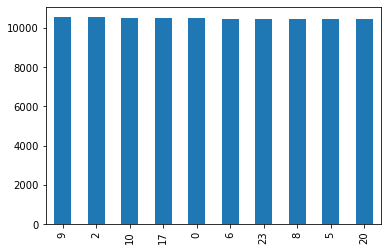

In [11]:
df['hour_of_day'].value_counts()\
                 .head(10)\
                 .plot(kind='bar')
plt.show()

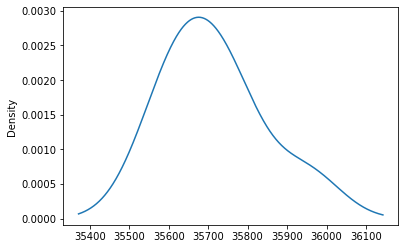

In [12]:
df['day_of_week'].value_counts()\
                 .plot(kind='kde')
plt.show()

In [13]:
df['day_of_week'].value_counts()\
                 .head(10)

6    35950
3    35771
2    35758
5    35677
4    35664
1    35616
0    35564
Name: day_of_week, dtype: int64

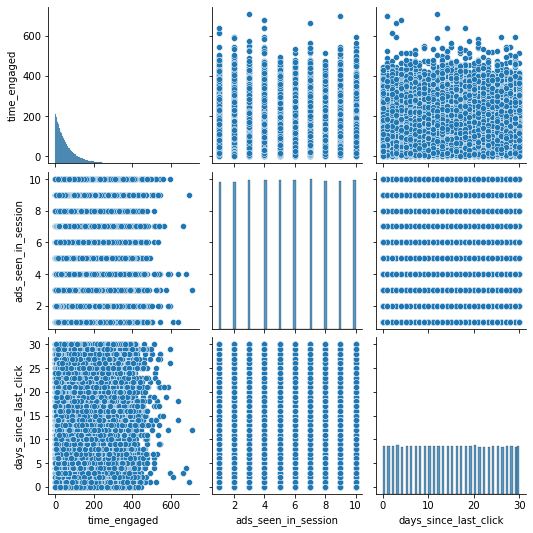

In [15]:
import seaborn as sns
sns.pairplot(df, vars=['time_engaged', 'ads_seen_in_session',
       'days_since_last_click'])
                    
plt.show()

In [16]:
df_corr = df[['time_engaged','session_duration', 'ads_seen_in_session', 'past_click_rate',
       'days_since_last_click']].dropna().corr()

df_corr

,time_engaged,session_duration,ads_seen_in_session,past_click_rate,days_since_last_click
time_engaged,1.000000,0.003173,-0.004700,0.004617,-0.002927
session_duration,0.003173,1.000000,-0.000643,0.001668,0.001298
ads_seen_in_session,-0.004700,-0.000643,1.000000,-0.001291,-0.000961
past_click_rate,0.004617,0.001668,-0.001291,1.000000,0.002424
days_since_last_click,-0.002927,0.001298,-0.000961,0.002424,1.000000


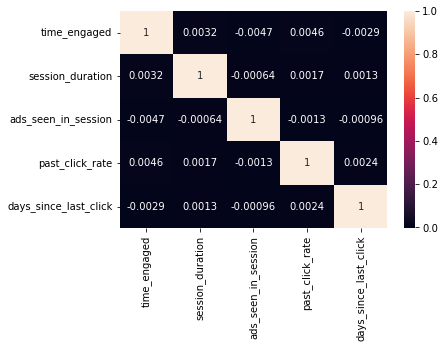

In [35]:
sns.heatmap(df_corr, annot=True)
plt.show()

### Model building

In [18]:
# good practice but XGboost and other tree based models do not care about distance 
# best possible splits 
df['high_value_user'] = df['high_value_user'].astype('category')
df['gender'] = df['gender'].astype('category')

In [19]:
df = pd.get_dummies(df)

In [20]:
df.columns

Index(['hour_of_day', 'day_of_week', 'age', 'time_engaged', 'session_duration',
       'ads_seen_in_session', 'past_click_rate', 'days_since_last_click',
       'avg_watch_time_per_ad', 'inventory_source_direct',
       'inventory_source_open_exchange',
       'inventory_source_private_marketplace', 'app_category_entertainment',
       'app_category_games', 'app_category_news', 'app_category_social',
       'device_type_desktop', 'device_type_mobile', 'device_type_tablet',
       'os_Android', 'os_Windows', 'os_iOS', 'gender_0', 'gender_1',
       'ad_format_banner', 'ad_format_native', 'ad_format_video',
       'high_value_user_0', 'high_value_user_1'],
      dtype='object')

In [21]:
df = df.drop("high_value_user_0", axis = 1)

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test=train_test_split(X,y,random_state=0)

In [24]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full, y_train_full, random_state=0)

### Understanding the parameters:

This model will build up to 250 decision-tree boosters, each added with a small learning rate of 0.01 so the ensemble learns gradually and reduces overfitting. Model performance is monitored with the AUC metric, and training stops early if the validation score fails to improve for five consecutive rounds, saving time and preventing unnecessary trees. Setting n_jobs = -1 lets XGBoost use all available CPU cores for faster training.

In [25]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators = 250,
                        learning_rate = 0.01,
                        eval_metric = "auc",
                        early_stopping_rounds = 5,
                        n_jobs = -1)

In [26]:
xgb_clf.fit(X_train, y_train,                    
            eval_set = [(X_val,y_val)],
            verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

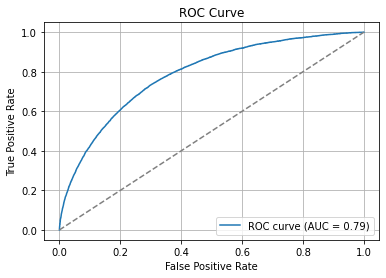

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get predicted probabilities (for class 1)
y_probs = xgb_clf.predict_proba(X_val)[:, 1]

# 2. Get FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_probs)

# 3. Calculate AUC
roc_auc = auc(fpr, tpr)

# 4. Plot
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### ROC AUC Curve:
This plot shows how well our classifier separates the two classes across all possible score cut-offs. False Positive Rate (x-axis)  – share of negative cases the model wrongly flags as positive. True Positive Rate (y-axis)  – share of positive cases the model catches. A diagonal from (0, 0) to (1, 1) is pure chance. Any useful model must stay above it.

Our curve in blue rises steeply at the start, then bends toward the top-right corner. A steep early rise is good: at low FPR the model already finds many true positives. The tail flattens, which is normal; catching the last few positives forces more false alarms.

AUC = 0.79 or Area under the curve is 0.79. Interpret it as: if we randomly pick one positive and one negative session, the model will score the positive higher 79 % of the time. 0.5 would be guessing and 1.0 would be perfect.

Also, the curve itself uses no single cut-off. We still need to pick one point on it (say FPR = 0.1) that matches the tolerance for false alerts. Wherever we click a point, that y is the corresponding recall. The model delivers a clear lift over random and recovers most positives before errors explode. An AUC near 0.8 is often acceptable in marketing tasks, but further tuning, better features, or ensemble methods could push it higher.

In [28]:
from sklearn.metrics import accuracy_score
import numpy as np

In [29]:
pred_test = xgb_clf.predict(X_test)
test_score = accuracy_score(pred_test, y_test)
print("Test score:", np.round(test_score,2))

Test score: 0.83


In [30]:
pred_train = xgb_clf.predict(X_train_full)
train_score = accuracy_score(pred_train, y_train_full)
print("Train score:", np.round(train_score,2))

Train score: 0.83


In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr.fit(X_train, y_train)
print("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.8273333333333334


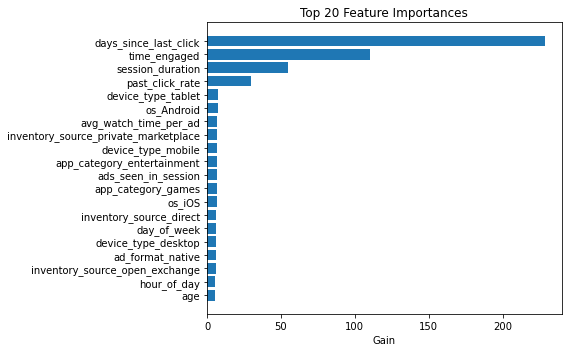

In [33]:
# 1. Get importances (gain is usually the most useful)
booster = xgb_clf.get_booster()
scores  = booster.get_score(importance_type='gain')

# 2. Turn into sorted lists
features, gains = zip(*sorted(scores.items(), key=lambda x: x[1], reverse=True))
features = np.array(features)[:20]   # top 20
gains    = np.array(gains)[:20]

# 3. Plot
plt.figure(figsize=(8, 5))
plt.barh(range(len(features))[::-1], gains)           # horizontal bars, descending
plt.yticks(range(len(features))[::-1], features)
plt.xlabel('Gain')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

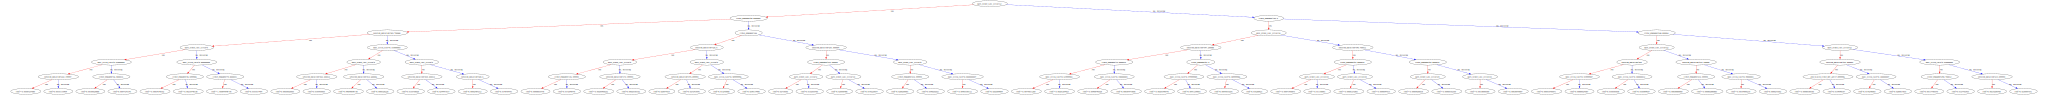

In [34]:
# visual intuition
from xgboost import to_graphviz; to_graphviz(xgb_clf, num_trees=0)